## HW 9, Due Nov 13 (20pt)

1. Write a function that output the first n numbers, storing in a list,  in the sequence given by the following iteration rules, 

\begin{equation}
x_{n+1} = r x_{n} (1-x_n)
\end{equation}


where $r$ and $x_0$ should be given as the input of the function. This is called [logistic map ](https://en.wikipedia.org/wiki/Bifurcation_diagram). (4pt)

In [1]:
def logistic_map(r = 0, xo = 0, n = 0):
    count = 0
    number_list = []

    while count < n:
        xn = r*xo*(1-xo)
        number_list.append(xn)
        count += 1
        xo +=1
    return number_list
    
logistic_map(2.2,0.3,10)

[0.46199999999999997,
 -0.8580000000000002,
 -6.5779999999999985,
 -16.697999999999997,
 -31.218,
 -50.138,
 -73.458,
 -101.17800000000001,
 -133.29800000000003,
 -169.81800000000004]

2. To understand why the logistic map is interesting, follow these steps

   a) Choose two very close initial x0, say 0.3 and 0.301 and set r=2.2. Use the function written in the last problem to get a list of first 100 numbers in the sequence for each initial conditions. Plot the two lists in a figure with title 'r=2.2', xlable 'number of iterations' and ylabel 'x'.
    
   b) Choose the same two initial conditions but for r=3.2. Plot the results again.
    
   c) Choose the same two initial conditions but for r=3.8. Plot the results again.
    
   How does the three cases different from each other? Do the two very close initial conditions lead to similar curves? (6pt)

Looking at the graphs, there appears to be no difference other than the graphs get more negative as the r value increases, as the initial conditions lead to similar curves for each r value (both curves being on top of eachother).

In [10]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 1.0, 'r = 2.2')

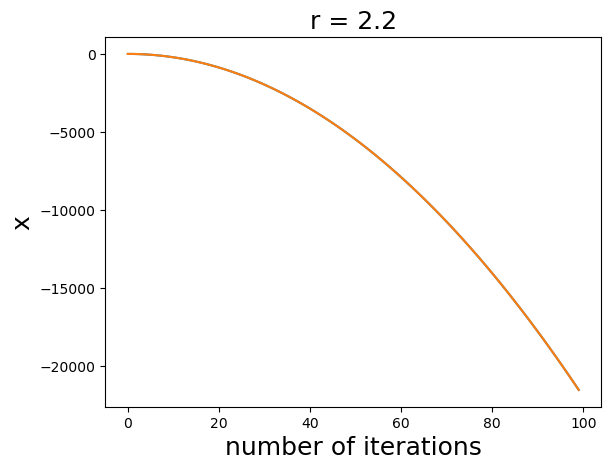

In [11]:
initial1 = logistic_map(2.2,0.4,100)
initial2 = logistic_map(2.2,0.401,100)

plt.plot(initial1)
plt.plot(initial2)

plt.xlabel('number of iterations',fontsize=18)
plt.ylabel('x',fontsize=18)
plt.title('r = 2.2',fontsize=18)

Text(0.5, 1.0, 'r = 3.2')

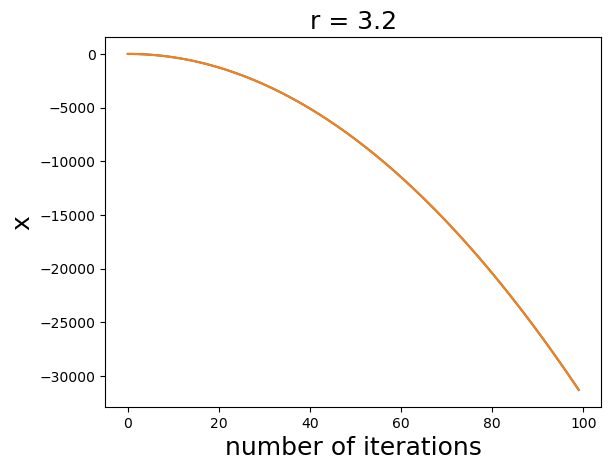

In [12]:
initial1 = logistic_map(3.2,0.4,100)
initial2 = logistic_map(3.2,0.401,100)

plt.plot(initial1)
plt.plot(initial2)

plt.xlabel('number of iterations',fontsize=18)
plt.ylabel('x',fontsize=18)
plt.title('r = 3.2',fontsize=18)

Text(0.5, 1.0, 'r = 3.8')

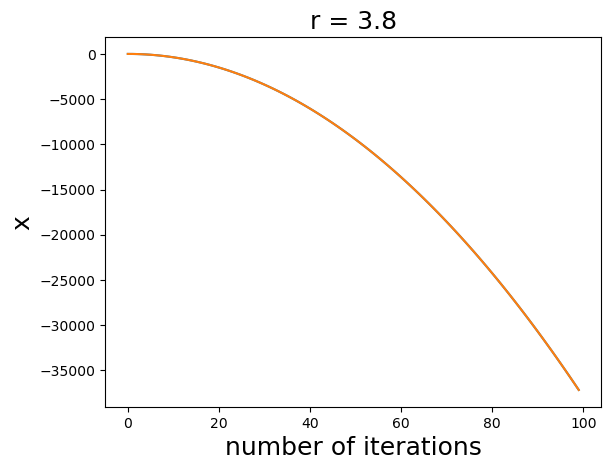

In [13]:
initial1 = logistic_map(3.8,0.4,100)
initial2 = logistic_map(3.8,0.401,100)

plt.plot(initial1)
plt.plot(initial2)

plt.xlabel('number of iterations',fontsize=18)
plt.ylabel('x',fontsize=18)
plt.title('r = 3.8',fontsize=18)

3. Write a function that simulates a ball moving on the pool table. (Check previous lecture notes) (5pt)

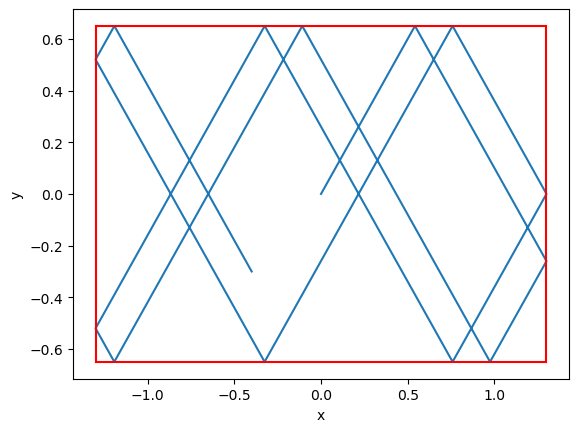

In [22]:
def motion(t_max, num_step, t=0, x=0, v=0, a=0, bd=(None,None)):
    time_list=[t]
    pos_list=[x]
    dt = t_max/num_step
    for i_step in range(num_step):
        t = t + dt
        v = v + a*dt
        x = x + v*dt

        if bd[0]!=None and x < bd[0]:
            x = 2*bd[0]-x
            v = -v 
        if bd[1]!=None and x > bd[1]:
            x = 2*bd[1]-x 
            v = -v 

        time_list.append(t)
        pos_list.append(x)
    return time_list, pos_list

time_list, pos_x = motion(t_max=2, num_step=7500, v=5, bd=(-1.3,1.3))


time_list, pos_y = motion(t_max=2, num_step=7500, v=6, bd=(-0.65,0.65))

plt.plot(pos_x,pos_y)
plt.xlabel('x');plt.ylabel('y')

plt.plot([-1.3, 1.3],[-0.65, -0.65],'r')
plt.plot([-1.3, 1.3],[0.65, 0.65],'r')
plt.plot([-1.3, -1.3],[-0.65, 0.65],'r')
plt.plot([1.3, 1.3],[-0.65, 0.65],'r')

4. Make an animation of the simulation. (5pt) The final exam will have a problem on animation. Please make sure you know how to do it.

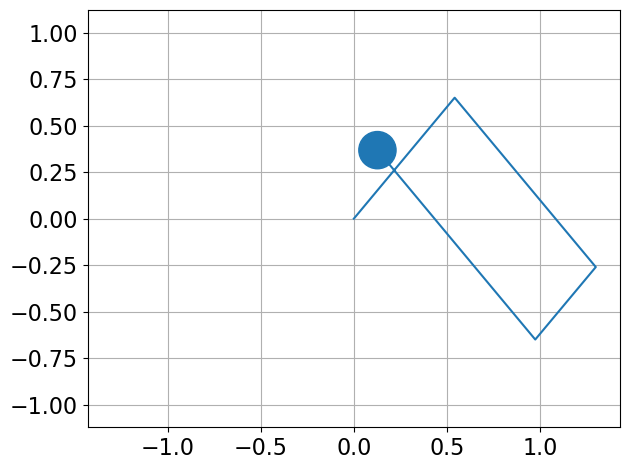

In [ ]:
plt.plot(pos_x, pos_y)

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

fig = plt.gcf() 
ax = plt.gca()
ax.axis('equal') 
plt.tight_layout()

plt.grid(True)
ax = plt.gca() 
ax.axis('equal') 

lines = ax.get_lines() 
line1 = lines[0]
line1.set_data(pos_x[0:1000000000000],pos_y[0:1000000000000])
fig

circle1 = plt.Circle((0,0),radius=0.1,color='tab:blue')
ax.add_patch(circle1)
fig

def draw_frame(frame_indx):
    lines[0].set_data(pos_x[0:frame_indx], pos_y[0:frame_indx])
    circle1.center = pos_x[frame_indx],pos_y[frame_indx]
    
import IPython
import time
for i_frame in range(1000000000000):
    draw_frame(i_frame)
    IPython.display.display(fig)
    IPython.display.clear_output(wait=True)
    time.sleep(0.01) 

draw_frame(1000000000000)